In [1]:
import os
import cv2

import shutil

import pandas as pd

import numpy as np

from shutil import move

from subprocess import call

import matplotlib.pyplot as plt

from urllib.request import urlretrieve

from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import load_img

from tensorflow.keras.utils import img_to_array



In [3]:
import os

# Get the current working directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

# Specify the path to the folder you want to change to
new_directory = "C:/Users/prana/Downloads"

# Change the current working directory
os.chdir(new_directory)

# Verify the change
updated_directory = os.getcwd()
print("Updated Directory:", updated_directory)


Current Directory: C:\Users\prana\DS - Python\Daily Notes_DL\DL_Day_10_B
Updated Directory: C:\Users\prana\Downloads


In [2]:
os.getcwd()

'C:\\Users\\prana\\DS - Python\\Daily Notes_DL\\DL_Day_10_B'

In [12]:
# Creating the directories

base_dr = os.getcwd()

# Generating the paths

extraction_point = os.path.join(base_dr, 'data','extracted_raw')
processed_data_path = os.path.join(base_dr, 'data','processed')

# Generatingb the directories

os.makedirs(extraction_point)
os.makedirs(processed_data_path)

In [13]:
extraction_point

'C:\\Users\\prana\\Downloads\\data\\extracted_raw'

In [14]:
# Downloading the data from Git hub by using url address


dataset_url = "http://aisdatasets.informatik.uni-freiburg.de/" \
              "freiburg_groceries_dataset/freiburg_groceries_dataset.tar.gz"

print("Downloading dataset.")
urlretrieve(dataset_url, "../freiburg_groceries_dataset.tar.gz")
print("Extracting dataset.")
call(["tar", "-xf", "../freiburg_groceries_dataset.tar.gz", "-C", extraction_point])
os.remove("../freiburg_groceries_dataset.tar.gz")
print("Done.")

Extracting dataset.
Done.


In [4]:
image_path = 'data/extracted_raw/images/BEANS/BEANS0000.png'

image_matrix = cv2.imread(image_path)

In [5]:
image_matrix.shape

AttributeError: 'NoneType' object has no attribute 'shape'

TypeError: Image data of dtype object cannot be converted to float

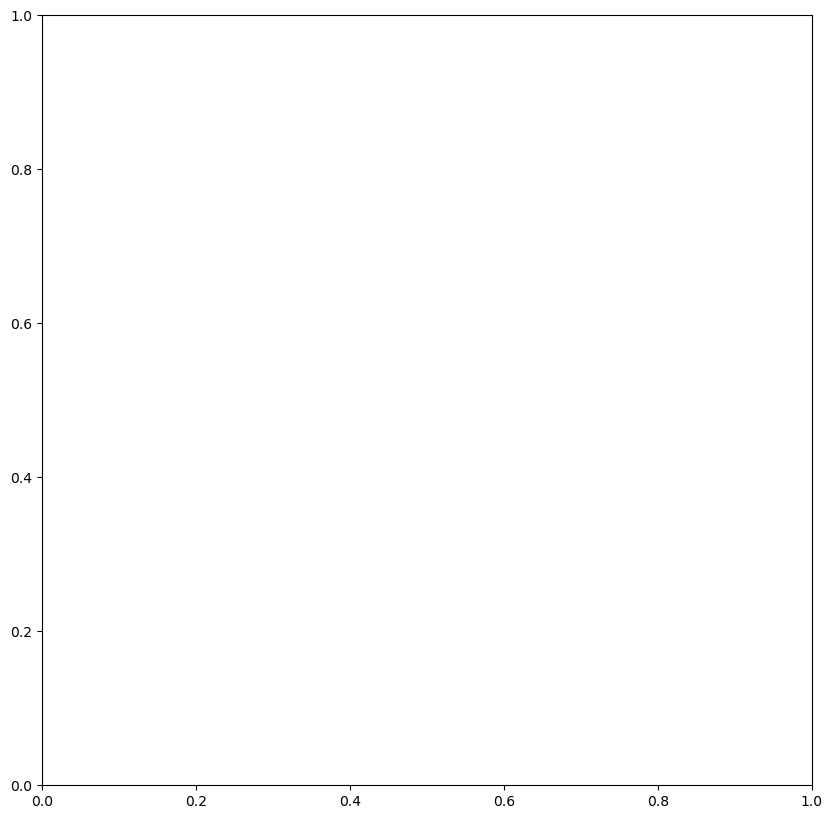

In [7]:
plt.figure(figsize = (12,10))
plt.imshow(image_matrix)
plt.show

In [6]:
plt.figure(figsize = (12,10))
plt.imshow(cv2.cvtColor(image_matrix, cv2.COLOR_BGR2RGB))
plt.show

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


<Figure size 1200x1000 with 0 Axes>

In [33]:
os.makedirs('data/extracted_raw/image1/PASTA', exist_ok = True)
os.makedirs('data/extracted_raw/image1/FLOUR', exist_ok = True)
os.makedirs('data/extracted_raw/image1/CEREAL', exist_ok = True)
os.makedirs('data/extracted_raw/image1/TEA', exist_ok = True)
os.makedirs('data/extracted_raw/image1/BEANS', exist_ok = True)

In [34]:
images_1 = [f for f in os.listdir('data/extracted_raw/images/PASTA')]
images_2 = [f for f in os.listdir('data/extracted_raw/images/FLOUR')]
images_3 = [f for f in os.listdir('data/extracted_raw/images/CEREAL')]
images_4 = [f for f in os.listdir('data/extracted_raw/images/TEA')]
images_5 = [f for f in os.listdir('data/extracted_raw/images/BEANS')]

for image in images_1:
  old_path = 'data/extracted_raw/images/PASTA/'+ image
  new_path = 'data/extracted_raw/image1/PASTA/'+ image
  shutil.move(old_path, new_path)

for image in images_2:
  old_path = 'data/extracted_raw/images/FLOUR/'+ image
  new_path = 'data/extracted_raw/image1/FLOUR/'+ image
  shutil.move(old_path, new_path)

for image in images_3:
  old_path = 'data/extracted_raw/images/CEREAL/'+ image
  new_path = 'data/extracted_raw/image1/CEREAL/'+ image
  shutil.move(old_path, new_path)

for image in images_4:
  old_path = 'data/extracted_raw/images/TEA/'+ image
  new_path = 'data/extracted_raw/image1/TEA/'+ image
  shutil.move(old_path, new_path)

for image in images_5:
  old_path = 'data/extracted_raw/images/BEANS/'+ image
  new_path = 'data/extracted_raw/image1/BEANS/'+ image
  shutil.move(old_path, new_path)

# Data Augmentation (ImageDataGenerator)

### base_dir

#### train

##### class1
##### class2
##### class3
##### class4
##### class5

#### test

##### class1
##### class2
##### class3
##### class4
##### class5



In [9]:
def directory_system_generator(source_directory, sink_directory):
  train_path, test_path = os.path.join(sink_directory, 'train'), os.path.join(sink_directory, 'test')

  classes = os.listdir(source_directory)
  train_classes_path = [os.path.join(train_path, class_) for class_ in classes ]
  test_classes_path = [os.path.join(test_path, class_) for class_ in classes ]

  print('working on the train directories')

  try:
    list(map(os.makedirs, train_classes_path ))
  except Exception as e:
    print('directory already exist')

  print('working on the test directories')

  try:
    list(map(os.makedirs, test_classes_path ))
  except Exception as e:
    print('directory already exist')

  print('sucessful')

  return train_path, test_path, classes




In [10]:
train_path, test_path, classes = directory_system_generator(source_directory= 'data/extracted_raw/image1', sink_directory= 'data/processed')

working on the train directories
directory already exist
working on the test directories
directory already exist
sucessful


In [11]:
train_path

'data/processed\\train'

In [38]:
classes

['BEANS', 'CEREAL', 'FLOUR', 'PASTA', 'TEA']

In [39]:
classes

['BEANS', 'CEREAL', 'FLOUR', 'PASTA', 'TEA']

In [40]:
def file_mover(source_directory, sink_directory, classes, test_size = 0.2, random_state = 64, format = '.png' ):
    for class_name in classes:
        print(f'working on {class_name} class')
        
        class_src_path = os.path.join(source_directory, class_name)
        all_images = [i for i in os.listdir(class_src_path) if i.endswith(format)]
        print(f'total images found : {len(all_images)}')

        all_images = pd.Series(all_images)
        train, test = train_test_split(all_images, test_size = test_size, random_state = random_state)

        train_source_paths = [os.path.join(class_src_path, file_path) for file_path in train ]
        train_data_sink = os.path.join(sink_directory, 'train',class_name)
        train_sink_paths = [os.path.join(train_data_sink, file_path) for file_path in train ]

        test_source_paths = [os.path.join(class_src_path, file_path) for file_path in test ]
        test_data_sink = os.path.join(sink_directory, 'test',class_name)
        test_sink_paths = [os.path.join(test_data_sink, file_path) for file_path in test ]

        list(map(move, train_source_paths,train_sink_paths))
        list(map(move, test_source_paths, test_sink_paths))

        print(f'all files moved for {class_name} class')
        print("*"*114)
    print('sucessful')


In [41]:
file_mover(source_directory = 'data/extracted_raw/image1', sink_directory= 'data/processed', classes = classes)

working on BEANS class
total images found : 136
all files moved for BEANS class
******************************************************************************************************************
working on CEREAL class
total images found : 278
all files moved for CEREAL class
******************************************************************************************************************
working on FLOUR class
total images found : 109
all files moved for FLOUR class
******************************************************************************************************************
working on PASTA class
total images found : 172
all files moved for PASTA class
******************************************************************************************************************
working on TEA class
total images found : 283
all files moved for TEA class
******************************************************************************************************************
sucessful


In [12]:
# Data Augmentation

train_datagen = ImageDataGenerator(rescale= 1/255,
                                   zoom_range = 0.3,
                                   height_shift_range = 0.2,
                                   width_shift_range = 0.4,
                                   shear_range = 0.2,
                                   rotation_range = 30,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale= 1/255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size = (256,256),
                                                    batch_size = 10,
                                                    classes = classes,
                                                    class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size = (256,256),
                                                  batch_size = 10,
                                                  classes = classes,
                                                  class_mode = 'categorical')

Found 780 images belonging to 5 classes.
Found 198 images belonging to 5 classes.


# Modelling

In [13]:
#-----------------------Building the base model---------------------------

# Initializing the model
cnn = tf.keras.Sequential()

# Adding the input layer
cnn.add(tf.keras.layers.Input(shape = (256,256,3)))

# Adding the First conv-pooling layer set
cnn.add(tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, padding = 'same'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size = 2, padding = 'same'))

# Adding the Second conv-pooling layer set
cnn.add(tf.keras.layers.Conv2D(filters = 15, kernel_size = 3, padding = 'same'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size = 2, padding = 'same'))

# Flattening the data
cnn.add(tf.keras.layers.Flatten())

# Adding the fully connected layers (ANN)

cnn.add(tf.keras.layers.Dense(units = 100, activation = 'relu', kernel_initializer = 'he_normal' ))
cnn.add(tf.keras.layers.Dense(units = 150, activation = 'relu', kernel_initializer = 'he_uniform' ))
cnn.add(tf.keras.layers.Dense(units = 200, activation = 'relu', kernel_initializer = 'he_normal' ))
cnn.add(tf.keras.layers.Dense(units = len(classes), activation = 'softmax', kernel_initializer = 'glorot_normal'))

# Compiling the model
cnn.compile(optimizer = 'Adam',
            loss = 'categorical_crossentropy',
            metrics = ['accuracy','Precision','Recall'])

In [14]:
# Summarizing the mdoel

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 10)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 15)      1365      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 15)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 61440)             0         
                                                                 
 dense (Dense)               (None, 100)               6

In [ ]:
cnn_history_obj = cnn.fit_generator(generator = train_generator,
                                    validation_data = test_generator,
                                    epochs = 5,
                                    use_multiprocessing = True,
                                    workers = 10)

C:\Users\prana\AppData\Local\Temp\ipykernel_3496\1675067420.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_history_obj = cnn.fit_generator(generator = train_generator,


Epoch 1/5




Exception in thread Thread-19 (_run):
Traceback (most recent call last):
  File "C:\Users\prana\anaconda3\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "C:\Users\prana\anaconda3\Lib\threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\prana\anaconda3\Lib\site-packages\keras\src\utils\data_utils.py", line 829, in _run
    with closing(self.executor_fn(_SHARED_SEQUENCES)) as executor:
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prana\anaconda3\Lib\site-packages\keras\src\utils\data_utils.py", line 804, in pool_fn
    pool = get_pool_class(True)(
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prana\anaconda3\Lib\multiprocessing\context.py", line 119, in Pool
    return Pool(processes, initializer, initargs, maxtasksperchild,
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prana\anaconda3\Lib\multiprocessing\pool.py", line 215, in __init__
    self._repopula

# Model Evaluation

In [23]:
# list of all data in history obj
print(cnn_history_obj.history.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


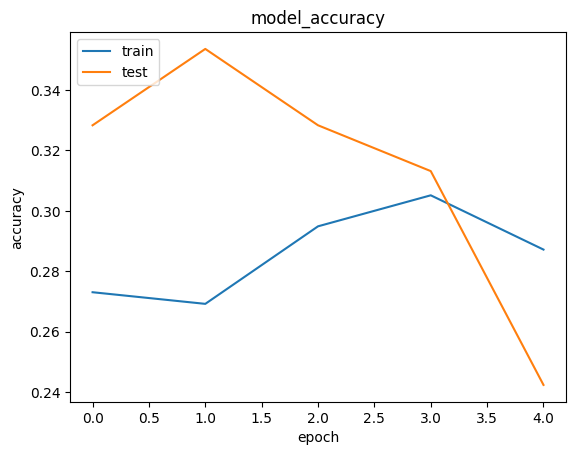

In [24]:
# Summarizing history obj for Accuracy
plt.plot(cnn_history_obj.history['accuracy'])
plt.plot(cnn_history_obj.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

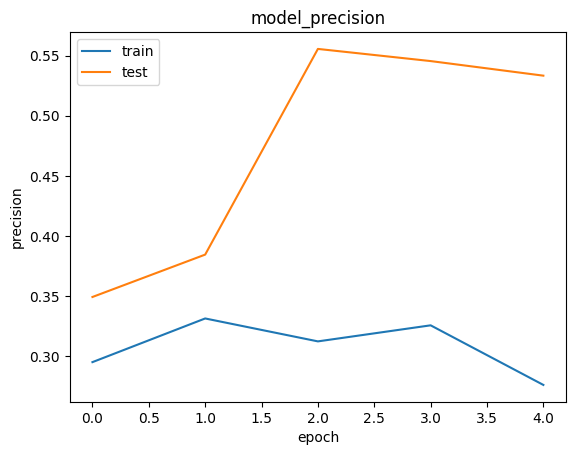

In [25]:
# Summarizing history obj for Precision
plt.plot(cnn_history_obj.history['precision'])
plt.plot(cnn_history_obj.history['val_precision'])
plt.title('model_precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

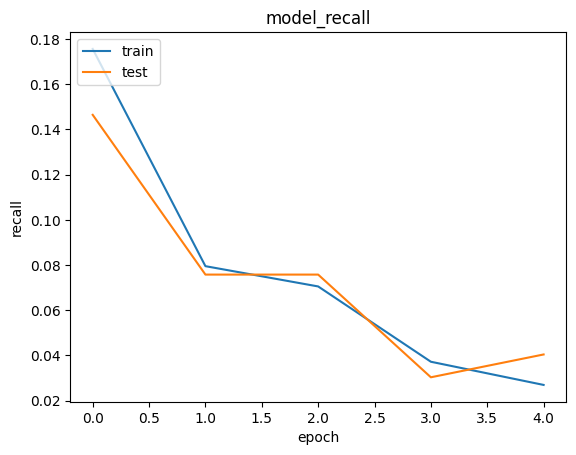

In [26]:
# Summarizing history obj for recall
plt.plot(cnn_history_obj.history['recall'])
plt.plot(cnn_history_obj.history['val_recall'])
plt.title('model_recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [28]:
# Saving the model

model_weight_dir = 'Weight'

os.makedirs(model_weight_dir, exist_ok = True)

# Saving the models weights
cnn.save(os.path.join(model_weight_dir, 'Best_model.tf'), save_format= 'tf')

In [29]:
# Loading the saved model

load_model = tf.keras.models.load_model('/content/Weight/Best_model.tf')

In [30]:
# Summarizing the load model
load_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 10)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 15)      1365      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 15)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 61440)             0         
                                                                 
 dense (Dense)               (None, 100)              

In [33]:
image = load_img('/content/data/processed/test/CEREAL/CEREAL0007.png', target_size = (256,256))

In [35]:
image_matrix = np.array(image)

In [37]:
image_matrix_normal = image_matrix/255

In [40]:
image_matrix_normal_flatten = image_matrix_normal.reshape(1,256,256,3)

In [41]:
label = load_model.predict(image_matrix_normal_flatten)

1/1 [==============================] - 0s 264ms/step


In [42]:
label

array([[0.19938684, 0.33618304, 0.05434413, 0.19142705, 0.21865897]],
      dtype=float32)

In [43]:
classes

['TEA', 'BEANS', 'FLOUR', 'CEREAL', 'PASTA']